# Comparing Interactions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.interpolate import interp1d
from scipy import interp, arange, array, exp
from scipy.interpolate import InterpolatedUnivariateSpline
import sys,os

import dgutils.colors as colortools


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']

plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

In [6]:
He_Graphene_dat = np.loadtxt("../data/he_potential.txt")

In [7]:
QMC_r = np.trim_zeros(He_Graphene_dat[:,0])
szalewicz_V = np.trim_zeros(He_Graphene_dat[:,1])
DFT_r = He_Graphene_dat[:,2]
He_He_V_DFT = He_Graphene_dat[:,3]
r_MP2 = np.trim_zeros(He_Graphene_dat[:,4])
V_He_MP2 = He_Graphene_dat[:len(r_MP2),5]
QMC_z = np.trim_zeros(He_Graphene_dat[:,6])
QMC_V = He_Graphene_dat[:len(QMC_z),7]
DFT_Z = np.trim_zeros(He_Graphene_dat[:,8])
He_Graphene_DFT = He_Graphene_dat[:len(DFT_Z),9]
z_MP2 = np.trim_zeros(He_Graphene_dat[:,10])
V_G_MP2 = He_Graphene_dat[:len(z_MP2),11]

# generate the QMC He-He interaction data
import heprops
QMC_r = np.linspace(2,5,1000)
szalewicz_V = heprops.potential.szalewicz_2012(QMC_r)

In [8]:
z_MP2_no_repeat = np.concatenate((z_MP2[0:4] , z_MP2[6:11], z_MP2[12:18], z_MP2[20:]))
V_G_MP2_no_repeat = np.concatenate((V_G_MP2[0:4] , V_G_MP2[6:11], V_G_MP2[12:18], V_G_MP2[20:]))
s = InterpolatedUnivariateSpline(z_MP2_no_repeat, V_G_MP2_no_repeat, k=2)
V_MP2_G_interp = s(DFT_Z)
colors = ["#d43e4e", "#abdda4", "#3288bc"]


## Plotting

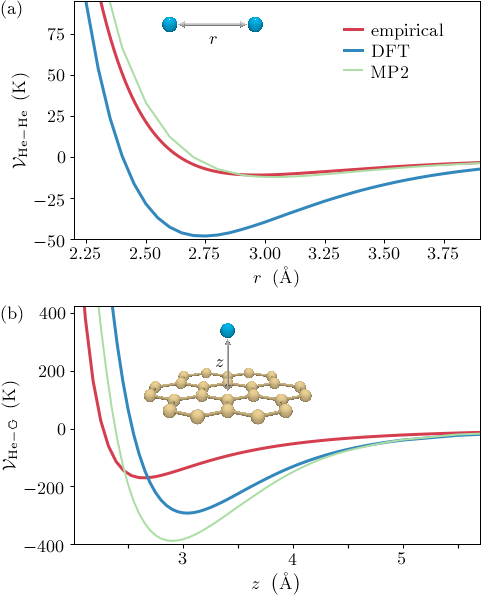

In [11]:

fig, ax = plt.subplots(2, 1, figsize = [3.4039, 2*2.10373], constrained_layout=True) 
ax[0].plot(QMC_r, szalewicz_V, color = colors[0])
ax[0].plot(DFT_r, He_He_V_DFT, color = colors[2])
ax[0].plot(r_MP2, V_He_MP2, label = 'MP2', color = colors[1], linewidth=1)
ax[0].set_xlim(2.2, 3.9)
ax[0].set_ylim(-50,95)
#ax[0].set_title("He-He")
ax[0].set_xlabel(r'$\alabel{r}{\angstrom}$')
ax[0].set_ylabel(r"$\alabel{\mathcal{V}_{\rm He-He}}{\kelvin}$")
ax[0].annotate('(a)', xy=(-0.18,1),ha='left', va='top', xycoords='axes fraction')

#ax[0].xaxis.set_minor_locator(MultipleLocator(0.5))
#ax[0].tick_params(which='minor', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
#                                   labelright = True, length=2.5)
#ax[0].tick_params(which='major', direction="out", top = False, bottom=True, left=True, right=False)


im = plt.imread('../plots/V_He_He.png',format='png')
newax = fig.add_axes([0.33, 0.85, 0.225, 0.20])
newax.imshow(im,interpolation='none')
newax.axis('off')
ax[0].annotate(r'$r$', xy=(2.8,77),xytext=(2.8, 77), 
                            xycoords='data', ha='right', va='top')

ax[1].plot(QMC_z, QMC_V, label = 'empirical', color = colors[0])
ax[1].plot(DFT_Z, He_Graphene_DFT, label = 'DFT', color = colors[2])
#ax[1].plot(zz,V1, label = 'Graphite')
ax[1].plot(DFT_Z, V_MP2_G_interp, color = colors[1], linewidth=1)
#ax[1].plot(z_Graphite_Composite,V_Graphite_Composite, label = 'Graphite?', color = colors[2], linewidth=1)
ax[1].set_xlim(2.01, 5.7)
ax[1].set_ylim(-400,425)
ax[1].set_xlabel(r'$\alabel{z}{\angstrom}$')
ax[1].set_ylabel(r"$\alabel{\mathcal{V}_{\rm He-\graphene}}{\kelvin}$")
ax[1].yaxis.set_label_position("left")
#ax[1].set_title("He-Graphene")
ax[1].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[1].annotate('(b)', xy=(-0.18,1),ha='left', va='top', xycoords='axes fraction')

#ax[1].tick_params(which='minor', direction="out", top = False, bottom=True, left=True, right=False, labelleft = True,
#                                   labelright = False, length=2.5)
#ax[1].tick_params(which='major', direction="out", top = False, bottom=True, left=True, right=False, labelleft = True,
#                                   labelright = False, length=4)

im = plt.imread('../plots/V_He_graphene.png',format='png')
newax = fig.add_axes([0.3, 0.275, 0.35, 0.20])
newax.imshow(im,interpolation='none')
newax.axis('off')
ax[1].annotate(r'$z$', xy=(3.375,260),xytext=(3.375, 260), 
                            xycoords='data', ha='right', va='top')

#fig.subplots_adjust(wspace=0.03, top=0.7)
#fig.subplots_adjust(right = 0.88, hspace=0.3)
#fig.tight_layout()

handles2, labels2 = ax[0].get_legend_handles_labels()
handles, labels = ax[1].get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
fig.legend(handles, labels, bbox_to_anchor=(0.95,0.98), frameon = False, handlelength = 1)
#fig.legend(handles, labels, loc='upper center', frameon = True, ncol=3, handlelength = 1)


#plt.legend()
#plt.show()

plt.savefig('../plots/He_Graphene_Potential.pdf',transparent=True) 
plt.savefig('../plots/He_Graphene_Potential.png',transparent=True, dpi=300) 

## Alternate: Combined final results for V and V' with interaction

In [47]:
from scipy import interpolate
func_V_He_MP2_interp = interpolate.interp1d(r_MP2, V_He_MP2, kind='cubic')
r_MP2_interp = np.linspace(np.min(r_MP2),np.max(r_MP2),1000)
V_He_MP2_interp = func_V_He_MP2_interp(r_MP2_interp)

func_He_He_V_DFT = interpolate.interp1d(DFT_r, He_He_V_DFT,kind='cubic')
DFT_r_interp = np.linspace(np.min(DFT_r),np.max(DFT_r),1000)
He_He_V_DFT_interp = func_He_He_V_DFT(DFT_r_interp)

### Results for V and V'

In [146]:
results = {}
results['HF'] = [69.7 ,-2.08 ]
results['QMC'] = [54.3, -2.76]
results['DFT'] =  [21.4, -1.36]
results['MP2'] = [51.5 , -1.97]

rvals = [np.sqrt(3)*1.42,3*1.42]

col = {}
col['HF'] = None
col['QMC'] = colors[0]
col['DFT'] = colors[2]
col['MP2'] = colors[1]

props = {}
props['HF'] = {'mfc':'White', 'mec':colors[0], 'ms':3, 'label':'HF', 'marker':'^', 'mew':0.6,'zorder':-2, 'lw':0}
props['QMC'] = {'mfc':colortools.get_alpha_hex(colors[0],0.8), 'mec':colors[0], 'ms':3, 'label':'QMC', 'marker':'o', 'mew':0.6,'zorder':2, 'lw':0}
props['DFT'] = {'mfc':colortools.get_alpha_hex(colors[2],0.8), 'mec':colors[2], 'ms':3, 'label':'DFT', 'marker':'s', 'mew':0.6,'zorder':-2, 'lw':0}
props['MP2'] = {'mfc':colortools.get_alpha_hex(colors[1],0.8), 'mec':colors[1], 'ms':3, 'label':'MP2', 'marker':'D', 'mew':0.6,'zorder':-2, 'lw':0}

methods = ['HF','QMC','DFT','MP2']

aₒ = 1.42

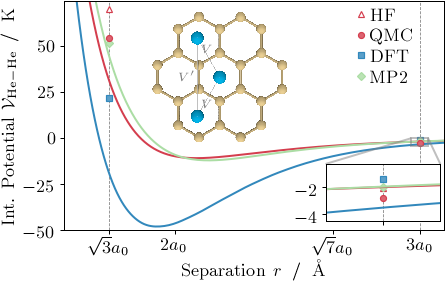

In [198]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1, 1) 

ax.plot(QMC_r, szalewicz_V, color = colors[0], lw=1)
ax.plot(DFT_r_interp, He_He_V_DFT_interp, color = colors[2], lw=1)
ax.plot(r_MP2_interp, V_He_MP2_interp, color = colors[1], lw=1)
ax.set_xlim(2.2, 3.1*aₒ)
ax.set_ylim(-50,74)
ax.set_xlabel('Separation' + r'$\,\,\alabel{r}{\angstrom}$')
ax.set_ylabel('Int. Potential' + r'$\,\,\alabel{\mathcal{V}_{\rm He-He}}{\kelvin}$')


## Plot the raw data as points
for method in methods:
    for i in range(2):
        ax.plot(rvals[i],results[method][i],**props[method])


handles, labels = ax.get_legend_handles_labels()


axins1 = ax.inset_axes([.69, .04, .3, .25])

axins1.plot(QMC_r, szalewicz_V, color = colors[0], lw=1)
axins1.plot(DFT_r_interp, He_He_V_DFT_interp, color = colors[2], lw=1)
axins1.plot(r_MP2_interp, V_He_MP2_interp, color = colors[1], lw=1)

for method in methods:
    axins1.plot(rvals[1],results[method][1],**props[method])

rmin,rmax = 3*aₒ-0.05,3*aₒ+0.05
axins1.set_xlim(rmin, rmax)
axins1.set_ylim(-4.5,-0.25)

axins1.set_xticklabels('')
#axins1.set_yticklabels('')


rec = ax.indicate_inset_zoom(axins1)

ticks = [np.sqrt(3)*aₒ, 2*aₒ, np.sqrt(7)*aₒ, 3*aₒ]
tick_labels = [r'$\sqrt{3}a_0$', r'$2a_0$',r'$\sqrt{7}a_0$',r'$3a_0$']
plt.xticks(ticks,tick_labels)
ax.axvline(x=np.sqrt(3)*aₒ,ls='--', color='grey', lw=0.4, zorder=-10)
ax.axvline(x=3*aₒ,ls='--', color='grey', lw=0.4, zorder=-10)
axins1.axvline(x=3*aₒ,ls='--', color='grey', lw=0.4, zorder=-10)

axins1.set_xticks([3*aₒ])

plt.legend(handles[::2],labels[::2], loc=(0.76,0.6))

im = plt.imread('../plots/V_Vp_He_graphene.png',format='png')
newax = fig.add_axes([0.2, 0.4, 0.48, 0.48/factor])
newax.imshow(im,interpolation='none')
newax.axis('off')

ax.annotate(r'$V^\prime$', xy=(2.96,35.5),xytext=(2.96, 35.5), color='grey',
                            xycoords='data', ha='right', va='top',fontsize=6)

ax.annotate(r'$V$',xy=(3.05, 20.5), color='grey', zorder=20,
                            xycoords='data', ha='right', va='top',fontsize=6)
ax.annotate(r'$V$',xy=(3.05, 50.5), color='grey', zorder=20,
                            xycoords='data', ha='right', va='top',fontsize=6)

plt.savefig('../plots/He_Graphene_Potential_data.pdf',transparent=True) 
#plt.savefig('../plots/He_Graphene_Potential.png',transparent=True, dpi=300) 

In [159]:
factor = 1440/1388 